Collect all data

In [25]:
import pandas as pd
dfs = []
dfs.append(pd.read_csv('../results/17824621.csv'))
dfs.append(pd.read_csv('../results/17827845.csv'))
dfs.append(pd.read_csv('../results/17827850.csv'))
dfs.append(pd.read_csv('../results/17827855.csv'))
dfs.append(pd.read_csv('../results/17827870.csv'))
dfs.append(pd.read_csv('../results/17838246.csv'))
dfs.append(pd.read_csv('../results/17838254.csv'))
data = pd.concat(dfs)
data = data.rename(columns={'hyperparam': 'n_components'})
data

,fold,n_components,error,walltime,cputime
0,1,1,38.83,00:12:05,00:54:23
1,2,1,40.65,00:12:05,00:54:23
2,3,1,40.24,00:12:05,00:54:23
3,4,1,38.77,00:12:05,00:54:23
4,5,1,39.13,00:12:05,00:54:23
...,...,...,...,...,...
45,6,24,41.40,1-23:10:55,18-01:02:57
46,7,24,44.23,1-23:10:55,18-01:02:57
47,8,24,42.37,1-23:10:55,18-01:02:57
48,9,24,42.67,1-23:10:55,18-01:02:57


Convert wall- and cputime to minutes.

Note walltime is total time spend to compute all folds, whilst cpu time is total **accumulated** time spent by each individual fold on training and testing the model.

In [26]:
def to_minutes(duration):
    '''converts duration to minutes.
    e.g. "00:54:23"   to 54.38 min
    e.g. "1-00:00:00" to 1440.00 min (= 1 day)'''
    days = duration.str.extract(r'(\d)-.*', expand=False)
    days = pd.to_numeric(days)
    timestamp = duration.str.replace(r'\d-', '')
    minutes = timestamp.apply(lambda x: pd.Timedelta(x).total_seconds() / 60)
    return minutes + days.fillna(0) * 24 * 60

data['walltime (minutes)'] = to_minutes(data['walltime'])
data['cputime (minutes)'] = to_minutes(data['cputime'])

Plot `n_components` versus error rate

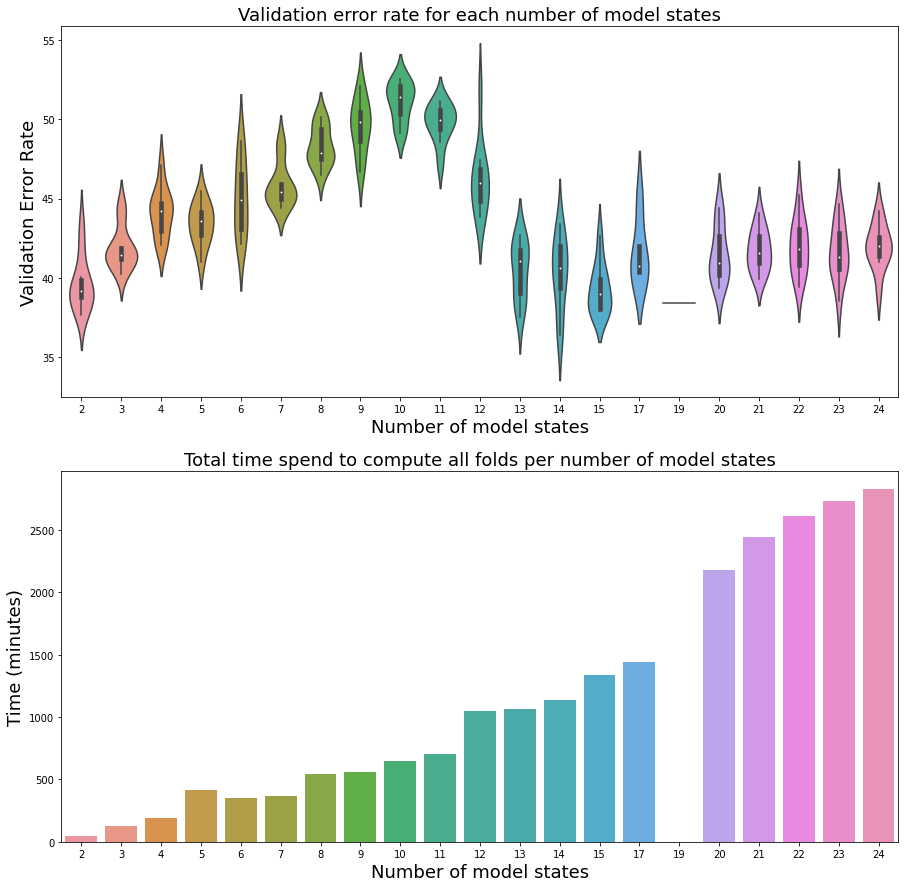

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(15,15))
sns.violinplot(data=data.loc[data.n_components > 1], x='n_components', y='error', ax=ax0)
ax0.set_title('Validation error rate for each number of model states', fontsize=18)
ax0.set_xlabel("Number of model states", fontsize=18)
ax0.set_ylabel("Validation Error Rate", fontsize=18)

sns.barplot(data=data.loc[data.n_components > 1], x='n_components', y='walltime (minutes)', ax=ax1)
ax1.set_title('Total time spend to compute all folds per number of model states', fontsize=18)
ax1.set_xlabel("Number of model states", fontsize=18)
ax1.set_ylabel("Time (minutes)", fontsize=18)

# fig.suptitle("Test error and walltime for each number of model states", fontsize=14)
plt.show()

Compare effect of subset sizes on performance

In [33]:
import pandas as pd
subsetdata = pd.read_csv('../results/17846863.csv')
subsetdata = subsetdata.rename(columns={'hyperparam': 'subset_size'})
subsetdata['n_components'] = 2
subsetdata['walltime (minutes)'] = to_minutes(subsetdata['walltime'])
subsetdata['cputime (minutes)'] = to_minutes(subsetdata['cputime'])
fullsubset = data[data['n_components'] == 2]
fullsubset['subset_size'] = 9889
subsetdata = pd.concat([subsetdata, fullsubset])
subsetdata.head()

,fold,subset_size,error,walltime,cputime,n_components,walltime (minutes),cputime (minutes)
0,1,10,40.08,00:47:58,07:16:04,2,47.966667,436.066667
1,2,10,39.17,00:47:58,07:16:04,2,47.966667,436.066667
2,3,10,38.12,00:47:58,07:16:04,2,47.966667,436.066667
3,4,10,41.76,00:47:58,07:16:04,2,47.966667,436.066667
4,5,10,39.23,00:47:58,07:16:04,2,47.966667,436.066667


<AxesSubplot:xlabel='subset_size', ylabel='error'>

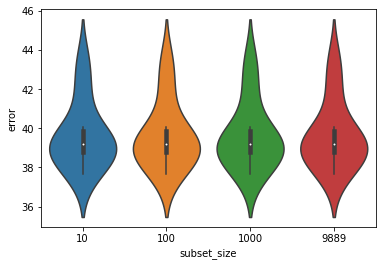

In [34]:
sns.violinplot(data=subsetdata, x='subset_size', y='error')

<AxesSubplot:xlabel='subset_size', ylabel='walltime (minutes)'>

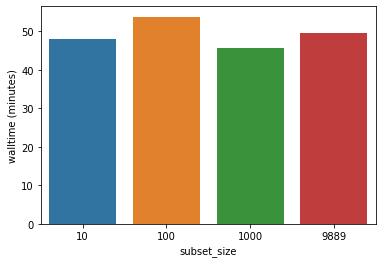

In [35]:
sns.barplot(data=subsetdata, x='subset_size', y='walltime (minutes)')

Total CPU time spent

In [15]:
'{:.0f} hours spent computing on a CPU'.format(\
    data['cputime (minutes)'].sum()/60)

'29192 hours spent computing on a CPU'

## HMM vs Naive method

In [16]:
hmm_method = data.loc[data.n_components == 2].error
naive_method = [47.83, 46.01, 44.99, 46.81, 46.61, 46.11, 46.96, 42.71, 45.55, 44.64]

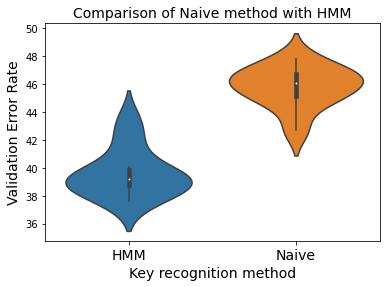

In [17]:
sns.violinplot(data=[hmm_method, naive_method])
plt.xlabel("Key recognition method", fontsize=14)
plt.ylabel("Validation Error Rate", fontsize=14)
plt.xticks([0, 1], labels=["HMM", "Naive"], fontsize=14)
plt.title("Comparison of Naive method with HMM", fontsize=14)
plt.show()